In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import zscore
import numpy as np

In [2]:
# Specify the local file path on your laptop
file_path = 'D:/top250-00-19.csv'

# Read the CSV file
df = pd.read_csv(file_path)

df=df.drop(['Name','Season','League_from','League_to','Position'],axis=1)
df=df.dropna()

#df=df.fillna(df[col].mean())
#df=df.fillna(df[col].median())
#df=df.fillna(df[col].Mostfreqant())

print(df.columns)
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype not in ['int64', 'float64']:
        df[col] = label_encoder.fit_transform(df[col])

X = df.drop(['Transfer_fee'], axis=1)
y = df['Transfer_fee']

Index(['Age', 'Team_from', 'Team_to', 'Market_value', 'Transfer_fee'], dtype='object')


In [22]:
'''Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
df = df[~outliers]'''

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=59)

Scaled R-squared: 0.770380827955845
Percentage of Variance Explained (Linear Regression): 77.04%


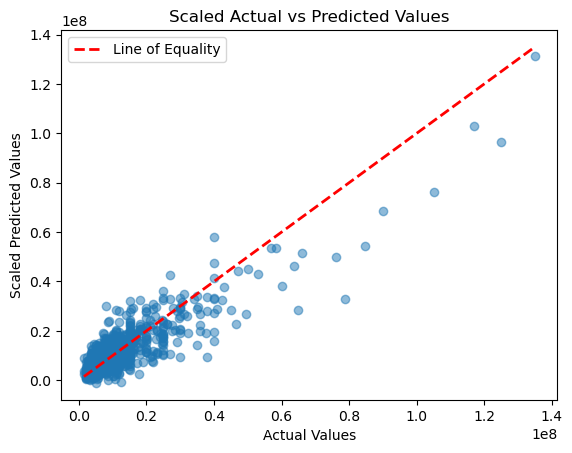

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


linear_reg = LinearRegression()

#cv_scores = cross_val_score(linear_reg, X_train_scaled, y_train, cv=5, scoring='r2')

linear_reg.fit(X_train_scaled, y_train)

y_pred_scaled = linear_reg.predict(X_test_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)
print(f"Scaled R-squared: {r2_scaled}")

variance_explained_r2 = r2_scaled * 100
print(f"Percentage of Variance Explained (Linear Regression): {variance_explained_r2:.2f}%")

plt.scatter(y_test, y_pred_scaled, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red',
         linewidth=2, label='Line of Equality')
plt.xlabel("Actual Values")
plt.ylabel("Scaled Predicted Values")
plt.title("Scaled Actual vs Predicted Values")
plt.legend()
plt.show()
